https://www.kaggle.com/datasets/pranaybshah/qatar-airways-reviews

In [21]:
import pandas as pd
df = pd.read_csv("/content/qatar_airways_reviews.csv")

In [22]:
df.head(10)

,Unnamed: 0,Date Published,Rating,Max Rating,Title,Author,Country,Date,Review Body,Type Of Traveller,Seat Type,Route,Date Flown,Recommended,Aircraft,Verified
0,0,2024-03-02,1.0,10.0,“marred by inconveniences”,Mary Le,United Kingdom,2024-03-02,The delay of my flight from Haneda to Doha ca...,Solo Leisure,Economy Class,Tokyo to London Heathrow via Doha,March 2024,no,NaN,0.0
1,1,2024-02-29,1.0,10.0,"""seat wouldn't stay up""",Brian English,Canada,2024-02-29,They convinced me that I needed to pay $1500...,Couple Leisure,Business Class,Doha to Montreal,February 2024,no,NaN,1.0
2,2,2024-02-29,1.0,10.0,"""no attempt to address our complaint""",Wayne Burgess,Australia,2024-02-29,I have sent 5 emails and have only received ...,Business,Economy Class,Doha to Perth,November 2023,no,A380,1.0
3,3,2024-02-25,10.0,10.0,“I hope they update the A380”,Alwaleed Althani,Qatar,2024-02-25,We flew on probably the first A380 the airlin...,Couple Leisure,First Class,Doha to London Heathrow,February 2024,NaN,A380-800,1.0
4,4,2024-02-22,7.0,10.0,"""I’d rate them maybe 7/10""",W Warnock,United Kingdom,2024-02-22,"Service was ok, pretty good on my aisle and ...",Couple Leisure,Business Class,Auckland to Doha,February 2024,no,A350,1.0
5,5,2024-02-20,10.0,10.0,"""remarkable experience""",Qandeel Ahtasham,United Kingdom,2024-02-20,12th February 2024 From check in to get onboa...,Family Leisure,Business Class,Doha to London,February 2024,NaN,A380,1.0
6,6,2024-02-20,10.0,10.0,“incredible service”,N Foster,United States,2024-02-20,"Remarkable experience. Great tasting food, l...",Family Leisure,Economy Class,New Delhi to San Francisco,February 2024,NaN,A350-1000,0.0
7,7,2024-02-16,7.0,10.0,"""not the extraordinary experience""",C Barker,Germany,2024-02-16,My last travel in January 2024 the food qual...,Couple Leisure,Economy Class,Dusseldorf to Kilimanjaro via Doha,January 2024,NaN,Boeing 787-9 / A330-300,1.0
8,8,2024-02-15,10.0,10.0,"""can’t get it any better""",B Darnel,Germany,2024-02-15,"What a trip, highest level possible, probabl...",Business,Business Class,Frankfurt to Melbourne via Doha,February 2024,NaN,Boeing 787 / 777,1.0
9,9,2024-02-14,4.0,10.0,"""refuse to fully reimburse me""",L Han,United States,2024-02-14,No complaints about the service or products ...,Solo Leisure,Business Class,New York to Johannesburg via Doha,November 2023,no,NaN,1.0


In [23]:
print(df.isnull().sum())

Unnamed: 0              0
Date Published          0
Rating                  1
Max Rating              1
Title                   0
Author                  0
Country                 0
Date                    0
Review Body             0
Type Of Traveller     435
Seat Type               0
Route                 438
Date Flown            444
Recommended          1781
Aircraft             1088
Verified             1117
dtype: int64


In [24]:
df.dropna(inplace=True)

In [25]:
print(df.isnull().sum())

Unnamed: 0           0
Date Published       0
Rating               0
Max Rating           0
Title                0
Author               0
Country              0
Date                 0
Review Body          0
Type Of Traveller    0
Seat Type            0
Route                0
Date Flown           0
Recommended          0
Aircraft             0
Verified             0
dtype: int64


In [26]:
import re
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove special characters and digits
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])
    # Remove extra whitespaces
    text = ' '.join(text.split())
    return text


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [27]:
# Apply preprocess_text function to 'review' column
df['clean_review'] = df['Review Body'].apply(preprocess_text)

# Display the preprocessed data
print(df[['Review Body', 'clean_review']].head(10))

                                          Review Body  \
2     I have sent 5 emails and have only received ...   
4     Service was ok, pretty good on my aisle and ...   
29    I booked a round-trip flight from MXP to BKK...   
39   Overall, it was okay. The food was pretty goo...   
43    From an epic experience to merely average. H...   
47    This has been my first flight on Qatar in Y ...   
55    First time on Qatar using BA miles. I find i...   
67     Flew from Singapore - Doha - Milan Return, ...   
73    The seats felt like auditorium seating, Ok f...   
93    We booked 2 business seats to Europe and we ...   

                                         clean_review  
2   sent emails received automatic response emails...  
4   service ok pretty good aisle extremely slow wi...  
29  booked roundtrip flight mxp bkk via doh paper ...  
39  overall okay food pretty good leg room accepta...  
43  epic experience merely average flown qr many t...  
47  first flight qatar class since o

In [28]:
import numpy as np
import nltk
nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [29]:
df['Review Body'] = df['Review Body'].replace(np.nan,'',regex=True) #consider this line

sentiment_scores=[]
for text in df['Review Body']:
  scores = sid.polarity_scores(text)
  sentiment_scores.append(scores['compound'])

df['Sentiment Score'] = sentiment_scores

In [30]:
def get_sentiment_label(score):
  if score >= 0.05:
    return 'Positive'
  elif score <= -0.05:
    return 'Negative'
  else:
    return 'Neutral'

sentiment_labels = df['Sentiment Score'].apply(get_sentiment_label)

df['Sentiment Label'] = sentiment_labels


In [31]:
df.head(10)

,Unnamed: 0,Date Published,Rating,Max Rating,Title,Author,Country,Date,Review Body,Type Of Traveller,Seat Type,Route,Date Flown,Recommended,Aircraft,Verified,clean_review,Sentiment Score,Sentiment Label
2,2,2024-02-29,1.0,10.0,"""no attempt to address our complaint""",Wayne Burgess,Australia,2024-02-29,I have sent 5 emails and have only received ...,Business,Economy Class,Doha to Perth,November 2023,no,A380,1.0,sent emails received automatic response emails...,-0.9952,Negative
4,4,2024-02-22,7.0,10.0,"""I’d rate them maybe 7/10""",W Warnock,United Kingdom,2024-02-22,"Service was ok, pretty good on my aisle and ...",Couple Leisure,Business Class,Auckland to Doha,February 2024,no,A350,1.0,service ok pretty good aisle extremely slow wi...,0.6808,Positive
29,29,2024-01-05,1.0,10.0,"""attempts to obtain a partial refund were igno...",Francesco Leonardi,Switzerland,2024-01-05,I booked a round-trip flight from MXP to BKK...,Solo Leisure,Business Class,Doha to Bangkok,December 2023,no,Boeing 777-300,1.0,booked roundtrip flight mxp bkk via doh paper ...,0.7976,Positive
39,39,2023-11-29,6.0,10.0,“seats were really uncomfortable”,C Dawson,Australia,2023-11-29,"Overall, it was okay. The food was pretty goo...",Couple Leisure,Economy Class,Brisbane to Amsterdam via Doha,October 2023,no,Boeing 777-300ER,1.0,overall okay food pretty good leg room accepta...,-0.0928,Negative
43,43,2023-11-19,3.0,10.0,"""The food was sub par""",James Goldie,United Arab Emirates,2023-11-19,From an epic experience to merely average. H...,Solo Leisure,Business Class,Istanbul to Dubai via Doha,November 2023,no,Boeing 777-300 er,1.0,epic experience merely average flown qr many t...,-0.7061,Negative
47,47,2023-11-11,2.0,10.0,"""seats were narrow and uncomfortable""",S Halden,Belgium,2023-11-11,This has been my first flight on Qatar in Y ...,Solo Leisure,Economy Class,Brussels to Doha,November 2023,no,Boeing 787,1.0,first flight qatar class since onset pandemic ...,-0.9186,Negative
55,55,2023-10-30,5.0,10.0,"""A350 is good and comfortable""",Charles Price,France,2023-10-30,First time on Qatar using BA miles. I find i...,Solo Leisure,Economy Class,Zurich to Lusaka via Doha,October 2023,no,A350 / Boeing 787,1.0,first time qatar using ba miles find hard unde...,0.9149,Positive
67,67,2023-10-10,1.0,10.0,"""Offered me 10,000 avios as compensation""",N Putul,Australia,2023-10-10,"Flew from Singapore - Doha - Milan Return, ...",Business,Business Class,Doha to Singapore,September 2023,no,A350-1000,1.0,flew singapore doha milan return bound flights...,-0.9883,Negative
73,73,2023-10-03,1.0,10.0,"""seating was simply just too small""",C Hardy,Australia,2023-10-03,"The seats felt like auditorium seating, Ok f...",Couple Leisure,Economy Class,Manchester to Brisbane via Doha,September 2023,no,Boeing 777-300er,1.0,seats felt like auditorium seating ok minutes ...,-0.2617,Negative
93,93,2023-09-18,2.0,10.0,"""changed our plane to one that didn't have Qsu...",J Meares,Australia,2023-09-18,We booked 2 business seats to Europe and we ...,Couple Leisure,Business Class,Sydney to Athens via Doha,August 2023,no,A380 / Boeing 777 / 787-9,1.0,booked business seats europe pay choose seats ...,-0.7346,Negative


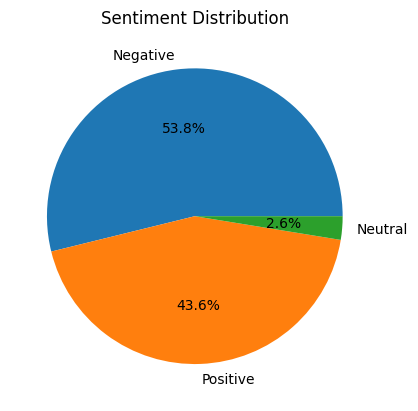

In [32]:
import matplotlib.pyplot as plt

sentiment_counts = df['Sentiment Label'].value_counts()

plt.pie(sentiment_counts, labels = sentiment_counts.index,autopct='%1.1f%%')
plt.title('Sentiment Distribution')
plt.show()

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
# Assuming you have a DataFrame named 'df' with a datetime column named 'datetime_column'
# Sort the DataFrame by the 'datetime_column'
sorted_df = df.sort_values(by='Date Published')

# Display the sorted DataFrame
sorted_df.head(10)


,Unnamed: 0,Date Published,Rating,Max Rating,Title,Author,Country,Date,Review Body,Type Of Traveller,Seat Type,Route,Date Flown,Recommended,Aircraft,Verified,clean_review,Sentiment Score,Sentiment Label
1251,1251,2017-11-19,10.0,10.0,"""disappointed the 6:30hr flight was over""",Mark Missoorten,Netherlands,2017-11-19,We were flying from Paris to Doha in busines...,Couple Leisure,Business Class,Paris to Doha,November 2017,no,Boeing 777-300ER,1.0,flying paris doha business class new qsuite im...,0.9143,Positive
1245,1245,2017-11-24,1.0,10.0,"""still refusing me any refund""",P Haime,France,2017-11-24,Barcelona to Hong Kong return via Doha in bu...,Family Leisure,Business Class,Barcelona to Hong Kong via Doha,September 2017,no,Boeing 787,1.0,barcelona hong kong return via doha business c...,-0.9136,Negative
1240,1240,2017-12-01,5.0,10.0,"""no communication from Qatar Airways""",Judith Stevens,United Kingdom,2017-12-01,London to Sydney via Doha went without hitch...,Solo Leisure,Business Class,London to Sydney via Doha,November 2017,no,A380,1.0,london sydney via doha went without hitch happ...,-0.7876,Negative
1228,1228,2017-12-17,5.0,10.0,"""No amenity kit in economy class""",H Gamad,United States,2017-12-17,Doha to Paris in August 2017. No amenity kit...,Solo Leisure,Economy Class,Doha to Paris,August 2017,no,A380,1.0,doha paris august amenity kit economy class fl...,-0.7003,Negative
1220,1220,2017-12-23,3.0,10.0,"""woke up just before landing""",Matthew Marich,Australia,2017-12-23,Milan to Jakarta via Doha in October 2017. W...,Solo Leisure,Economy Class,Milan to Jakarta via Doha,October 2017,no,A330-300 / Boeing 787-8,1.0,milan jakarta via doha october boarded staff f...,-0.6372,Negative
1192,1192,2018-02-24,3.0,10.0,"""luggage handling is infuriating""",Jon Theal,United States,2018-02-24,Chicago to Doha. I saw the ticket agent phys...,Business,Economy Class,Chicago to Doha,February 2018,no,Boeing 777-300,1.0,chicago doha saw ticket agent physically defla...,0.2064,Positive
1187,1187,2018-02-27,1.0,10.0,"""made people wait for 5 hours""",Sohaib Azam,Canada,2018-02-27,Islamabad to Montreal via Doha. While there ...,Solo Leisure,Economy Class,Islamabad to Montreal via Doha,February 2018,no,Boeing 777-300ER,1.0,islamabad montreal via doha always risk delaye...,-0.8020,Negative
1181,1181,2018-03-04,4.0,10.0,"""most uncomfortable seat""",D Gielen,Switzerland,2018-03-04,Frankfurt to Cape Town via Doha. We had old ...,Business,Business Class,Frankfurt to Cape Town via Doha,February 2018,no,Boeing 777ER,1.0,frankfurt cape town via doha old boeing er unc...,0.9436,Positive
1177,1177,2018-03-11,5.0,10.0,"""overall disappointing""",Kosta Calligeros,Australia,2018-03-11,"Barcelona to Melbourne via Doha. Plane, we ha...",Family Leisure,Economy Class,Barcelona to Melbourne via Doha,March 2018,no,Boeing 787-8,1.0,barcelona melbourne via doha plane flown twice...,-0.4919,Negative
1174,1174,2018-03-17,2.0,10.0,"""snack food tasted awful""",Robert Joy,United States,2018-03-17,Johannesburg to Houston via Doha. Ground Cre...,Couple Leisure,Economy Class,Johannesburg to Houston via Doha,March 2018,no,Boeing 777-300,1.0,johannesburg houston via doha ground crew frie...,-0.4599,Negative


<ipython-input-36-1b8c9e497863>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.sort_index(inplace=True)


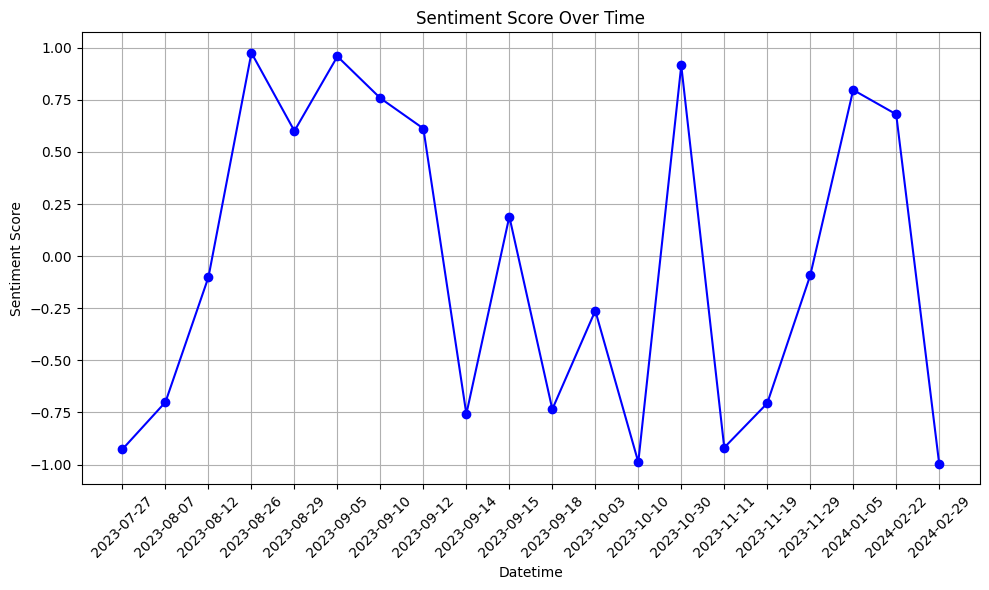

In [36]:
data = df.head(20)

# Set 'Datetime' column as index
data.set_index('Date Published', inplace=True)

# Sort dataframe by datetime index
data.sort_index(inplace=True)

# Plot line chart
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Sentiment Score'], marker='o', color='b', linestyle='-')
plt.xlabel('Datetime')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Score Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()